[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 09** | TdD III - Agregações e operações em grupo | Exercício 13

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 06 de junho de 2025.

---

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme()  
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
# idenficando as colunas do df
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
# idenficando as colunas do df e seus dtypes
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [5]:
# separando as variáveis
task2 = sinasc_raw[['MESPRENAT', 'CONSULTAS', 'munResLat']]
task2

,MESPRENAT,CONSULTAS,munResLat
0,1.0,4,-11.93554
1,2.0,4,-11.93554
2,1.0,4,-11.93554
3,2.0,3,-12.13178
4,2.0,4,-11.93554
...,...,...,...
27023,1.0,4,-12.74137
27024,1.0,4,-12.55684
27025,1.0,4,-12.74137
27026,1.0,4,-12.74137


In [6]:
# entendendo o df
task2.describe()

,MESPRENAT,CONSULTAS,munResLat
count,24161.000000,27028.000000,27027.000000
mean,8.129423,3.576402,-10.377988
std,22.672534,0.788492,1.372942
min,1.000000,1.000000,-13.499760
25%,2.000000,3.000000,-11.433870
50%,2.000000,4.000000,-10.435950
75%,3.000000,4.000000,-8.768890
max,99.000000,9.000000,-8.768890


In [7]:
# calcular os intervalos automaticamente
min_lat = task2['munResLat'].min()
max_lat = task2['munResLat'].max()
faixas_latitude = [min_lat, -10.5, max_lat]
faixas_latitude

[-13.49976, -10.5, -8.76889]

In [8]:
# criar a coluna de faixas de latitude usando pd.cut
task2['Faixa_Latitude'] = pd.cut(task2['munResLat'], bins=faixas_latitude, labels=['-13.5 a -10.5', '-10.51 a -8.6'])
task2.Faixa_Latitude.value_counts()

C:\Users\earap\AppData\Local\Temp\ipykernel_11344\553594708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task2['Faixa_Latitude'] = pd.cut(task2['munResLat'], bins=faixas_latitude, labels=['-13.5 a -10.5', '-10.51 a -8.6'])


Faixa_Latitude
-10.51 a -8.6    14034
-13.5 a -10.5    12913
Name: count, dtype: int64

In [9]:
# agrupando conforme faixas de idade
munreslat = pd.cut(task2['munResLat'], [-13.5, -10.5, -8.6])
munreslat.value_counts()

munResLat
(-10.5, -8.6]     14034
(-13.5, -10.5]    12993
Name: count, dtype: int64

In [10]:
# escrevendo a soma, média, mínima, máxima, mediana, desvio padrão e variância
agg = task2.groupby(['Faixa_Latitude'], observed=True)
estatisticas = agg.agg({
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'MESPRENAT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
estatisticas

CONSULTAS                                               \
                     sum      mean min max median       std       var   
Faixa_Latitude                                                          
-13.5 a -10.5      47690  3.693177   1   9    4.0  0.644439  0.415301   
-10.51 a -8.6      48662  3.467436   1   9    4.0  0.888240  0.788970   

               MESPRENAT                                                     
                     sum      mean  min   max median        std         var  
Faixa_Latitude                                                               
-13.5 a -10.5    93598.0  7.451477  1.0  99.0    2.0  21.388652  457.474417  
-10.51 a -8.6   102609.0  8.906258  1.0  99.0    2.0  24.040978  577.968642

#### A variância e o desvio padrão para a variável ``MESPRENAT`` indicam um alta dispersào dos dados em relação a média.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [11]:
# idenficando as colunas do df
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [12]:
# idenficando as colunas do df e seus dtypes
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [13]:
# separando as variáveis
task3 = sinasc_raw[['munResArea', 'QTDFILMORT', 'HORANASC']]
task3

,munResArea,QTDFILMORT,HORANASC
0,7067.025,0.0,1620.0
1,7067.025,0.0,1830.0
2,7067.025,0.0,915.0
3,3958.273,0.0,835.0
4,7067.025,0.0,750.0
...,...,...,...
27023,11518.915,0.0,2030.0
27024,5126.723,0.0,650.0
27025,11518.915,1.0,1430.0
27026,11518.915,0.0,741.0


In [14]:
# calcular os intervalos automaticamente
min_area = task3['munResArea'].min()
max_area = task3['munResArea'].max()
faixas_area = [min_area, 3000, max_area]
faixas_area

[459.978, 3000, 34096.394]

In [15]:
# criar a coluna de faixas de Área usando pd.cut
task3['FaixaArea'] = pd.cut(task3['munResArea'], bins=faixas_area, labels=['459.978 a 3000', '3001 a 34096.394'])
task3.FaixaArea.value_counts()

C:\Users\earap\AppData\Local\Temp\ipykernel_11344\3533664603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task3['FaixaArea'] = pd.cut(task3['munResArea'], bins=faixas_area, labels=['459.978 a 3000', '3001 a 34096.394'])


FaixaArea
3001 a 34096.394    21808
459.978 a 3000       5155
Name: count, dtype: int64

In [16]:
# escrevendo a soma, média, mínima, máxima, mediana, desvio padrão e variância
agg2 = task3.groupby(['FaixaArea'], observed=True)
estatisticas2 = agg2.agg({
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'HORANASC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
estatisticas2

QTDFILMORT                                                  \
                        sum      mean  min   max median       std       var   
FaixaArea                                                                     
459.978 a 3000       1247.0  0.245328  0.0   4.0    0.0  0.552102  0.304816   
3001 a 34096.394     5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743   

                    HORANASC                                                \
                         sum         mean  min     max  median         std   
FaixaArea                                                                    
459.978 a 3000     6427947.0  1249.358017  0.0  2357.0  1200.0  527.661468   
3001 a 34096.394  27719159.0  1271.696059  0.0  2359.0  1236.0  585.503531   

                                 
                            var  
FaixaArea                        
459.978 a 3000    278426.624520  
3001 a 34096.394  342814.384538

#### A variância e o desvio padrão para a variável ``HORANASC`` indicam um alta dispersào dos dados em relação a média.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [17]:
# separando as variáveis
task4 = sinasc_raw[['munResAlt', 'QTDPARTNOR', 'QTDPARTCES']]
task4

,munResAlt,QTDPARTNOR,QTDPARTCES
0,338.0,0.0,0.0
1,338.0,0.0,1.0
2,338.0,1.0,1.0
3,397.0,0.0,0.0
4,338.0,0.0,1.0
...,...,...,...
27023,595.0,1.0,0.0
27024,340.0,0.0,0.0
27025,595.0,0.0,0.0
27026,595.0,0.0,1.0


In [18]:
# identificando as alturas mínimas e máximas
min_alt=task4['munResAlt'].min()
max_alt=task4['munResAlt'].max()
media_alt=task4['munResAlt'].mean()
print(f'A altura mínima do município é {min_alt}, média: {media_alt} e a máxima é {max_alt}.')

A altura mínima do município é 85.0, média: 179.11199911199913 e a máxima é 595.0.


In [19]:
# criando as faixas de altura
faixas_alt = [min_alt, media_alt, max_alt]
faixas_alt

[85.0, 179.11199911199913, 595.0]

In [20]:
# criar a coluna de faixas de Área usando pd.cut
task4['FaixaAlt'] = pd.cut(task4['munResAlt'], bins=faixas_alt, labels=['85 a 179.12', '179.13 a 595'])
task4.FaixaAlt.value_counts()

C:\Users\earap\AppData\Local\Temp\ipykernel_11344\324522375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task4['FaixaAlt'] = pd.cut(task4['munResAlt'], bins=faixas_alt, labels=['85 a 179.12', '179.13 a 595'])


FaixaAlt
85 a 179.12     18817
179.13 a 595     7873
Name: count, dtype: int64

In [21]:
# escrevendo a soma, média, mínima, máxima, mediana, desvio padrão e variância
agg3 = task4.groupby(['FaixaAlt'], observed=True)
estatisticas3 = agg3.agg({
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
estatisticas3

QTDPARTNOR                                                  \
                    sum      mean  min   max median       std       var   
FaixaAlt                                                                  
85 a 179.12     11424.0  0.667719  0.0  40.0    0.0  1.247677  1.556698   
179.13 a 595     2839.0  0.366701  0.0  41.0    0.0  1.072247  1.149714   

             QTDPARTCES                                                  
                    sum      mean  min   max median       std       var  
FaixaAlt                                                                 
85 a 179.12      8330.0  0.484979  0.0  12.0    0.0  0.742243  0.550924  
179.13 a 595     4667.0  0.601340  0.0   5.0    0.0  0.749273  0.561411

#### A variância e o desvio padrão para a variável ``QTDPARTNOR`` indicam um alta dispersào dos dados em relação a média.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [22]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [23]:
# ajustar a configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [24]:
# separando o as variáveis do dataframe
task5 = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']].copy()
task5

,munResNome,IDADEMAE,DTNASC
0,Alta Floresta D'Oeste,19,2019-02-19
1,Alta Floresta D'Oeste,29,2019-02-21
2,Alta Floresta D'Oeste,37,2019-02-25
3,Alto Alegre dos Parecis,30,2019-03-20
4,Alta Floresta D'Oeste,30,2019-03-23
...,...,...,...
27023,Vilhena,32,2019-12-13
27024,Chupinguaia,19,2019-10-04
27025,Vilhena,24,2019-08-02
27026,Vilhena,21,2019-12-23


In [25]:
# convertendo a coluna DTNASC para datetime
task5.loc[:, 'DTNASC'] = pd.to_datetime(task5['DTNASC'], errors='coerce')

In [26]:
# criando uma nova coluna 'Regiao' baseada no dicionário 'imediatas'
task5.loc[:, 'regiao'] = task5['munResNome'].map(imediatas)
task5

,munResNome,IDADEMAE,DTNASC,regiao
0,Alta Floresta D'Oeste,19,2019-02-19 00:00:00,Cacoal
1,Alta Floresta D'Oeste,29,2019-02-21 00:00:00,Cacoal
2,Alta Floresta D'Oeste,37,2019-02-25 00:00:00,Cacoal
3,Alto Alegre dos Parecis,30,2019-03-20 00:00:00,Cacoal
4,Alta Floresta D'Oeste,30,2019-03-23 00:00:00,Cacoal
...,...,...,...,...
27023,Vilhena,32,2019-12-13 00:00:00,Vilhena
27024,Chupinguaia,19,2019-10-04 00:00:00,Vilhena
27025,Vilhena,24,2019-08-02 00:00:00,Vilhena
27026,Vilhena,21,2019-12-23 00:00:00,Vilhena


In [27]:
# convertendo DTNASC para datetime
task5['DTNASC'] = pd.to_datetime(task5['DTNASC'], errors='coerce')
task5.dtypes

munResNome            object
IDADEMAE               int64
DTNASC        datetime64[ns]
regiao                object
dtype: object

In [28]:
# agrupar por data de nascimento e região imediata e calcular a idade média das mães
task5_grouped = task5.groupby(['regiao', 'DTNASC']).agg({'IDADEMAE': 'mean'}).reset_index()
task5_grouped

,regiao,DTNASC,IDADEMAE
0,Ariquemes,2019-01-01,23.200000
1,Ariquemes,2019-01-02,26.166667
2,Ariquemes,2019-01-03,24.142857
3,Ariquemes,2019-01-04,24.666667
4,Ariquemes,2019-01-05,22.888889
...,...,...,...
2176,Vilhena,2019-12-27,27.000000
2177,Vilhena,2019-12-28,22.666667
2178,Vilhena,2019-12-29,24.250000
2179,Vilhena,2019-12-30,26.600000


In [29]:
# definir a coluna 'regiao' como o novo índice
# task5_grouped = task5_grouped.set_index('regiao')
# task5_grouped

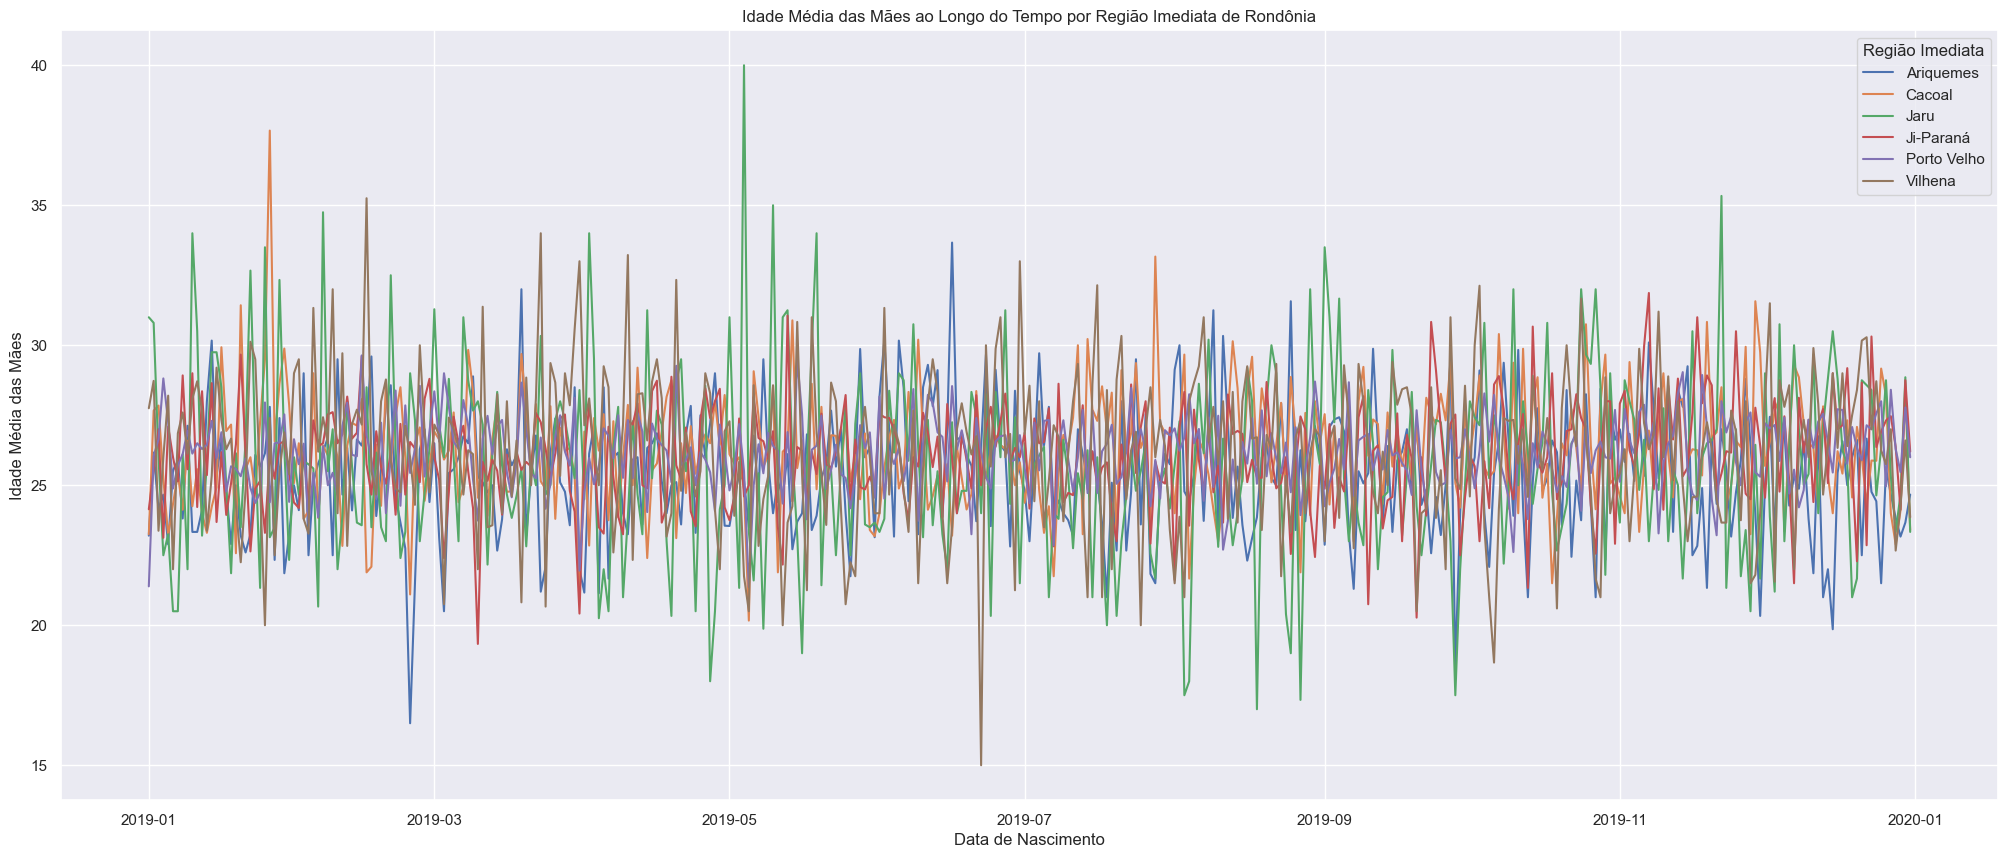

In [30]:
# criar o gráfico
fig, ax = plt.subplots(figsize=[25, 10])

# Plotar a idade média ao longo do tempo para cada região
for regiao in task5_grouped['regiao'].unique():
    subset = task5_grouped[task5_grouped['regiao'] == regiao]
    plt.plot(subset['DTNASC'], subset['IDADEMAE'], label=regiao)

# Adicionar título e rótulos aos eixos
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata de Rondônia')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média das Mães')

# Adicionar legenda
plt.legend(title='Região Imediata')

# Mostrar o gráfico
plt.show()

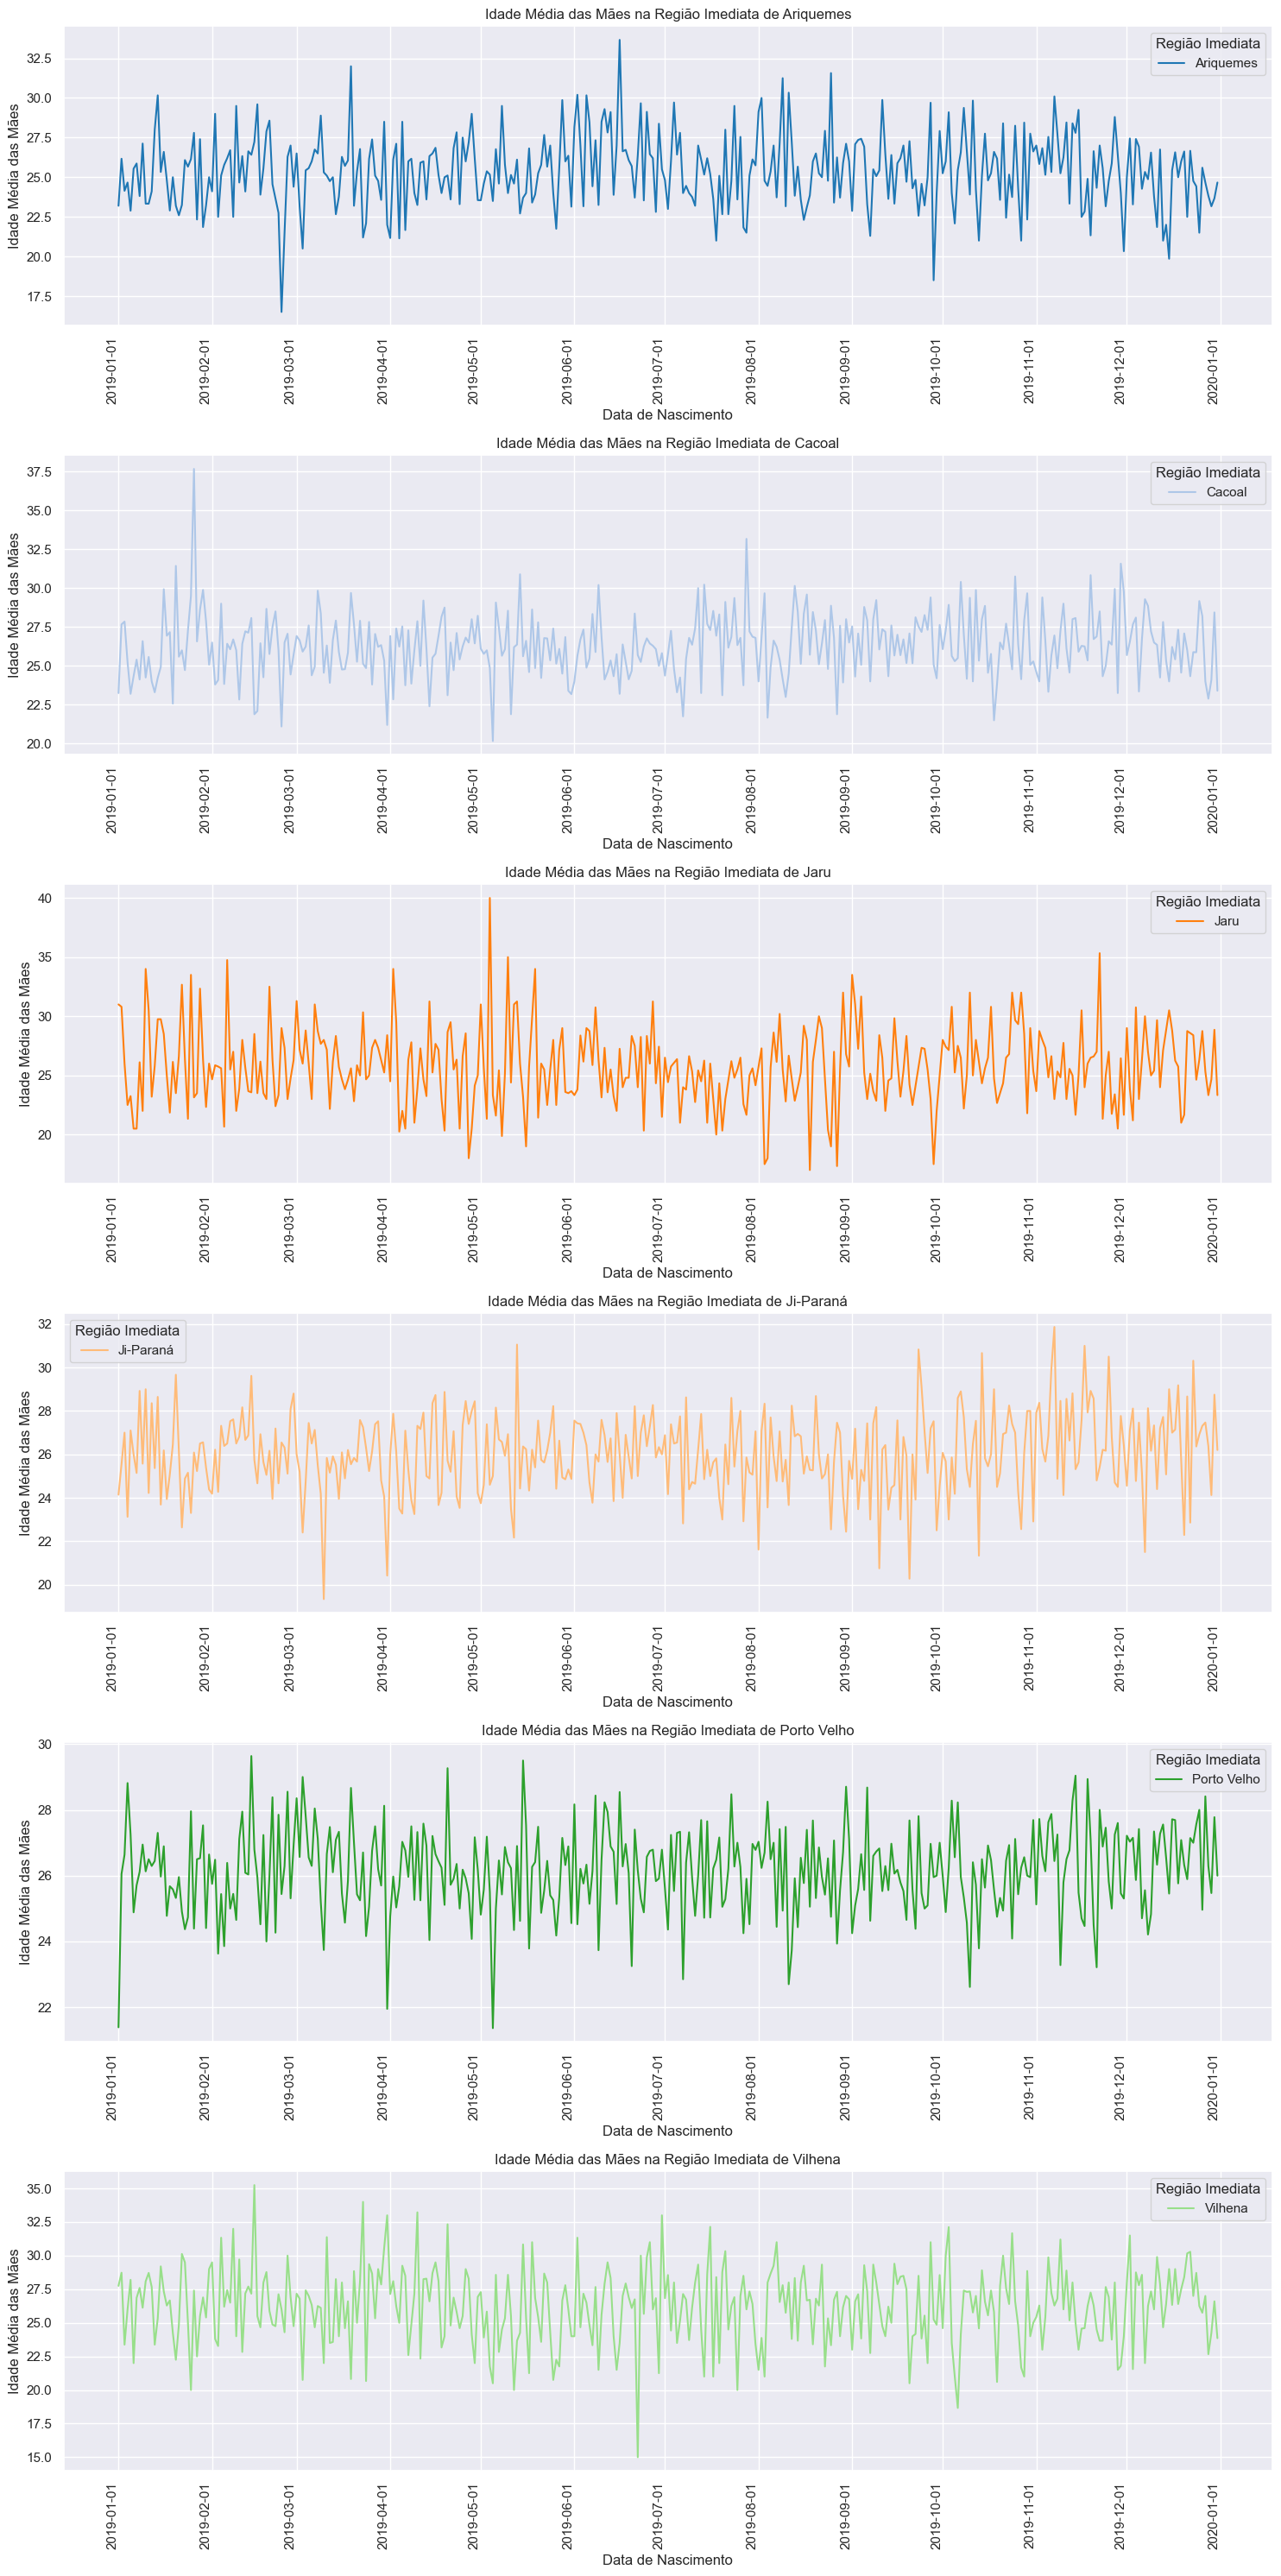

In [31]:
# obtem as regiões únicas e determinar o número de subplots necessários
regioes = task5_grouped['regiao'].unique()
num_regioes = len(regioes)

# criar a figura e os eixos
fig, axes = plt.subplots(nrows=num_regioes, ncols=1, figsize=[15, 5 * num_regioes])

# adicionar uma linha e um gráfico para cada região
for i, regiao in enumerate(regioes):
    subset = task5_grouped[task5_grouped['regiao'] == regiao]
    axes[i].plot(subset['DTNASC'], subset['IDADEMAE'], label=regiao, color=plt.cm.tab20(i % num_regioes))  # aplica uma paleta de cores distinta conforme o número de regiões
    axes[i].set_title(f'Idade Média das Mães na Região Imediata de {regiao}')
    axes[i].set_xlabel('Data de Nascimento')
    axes[i].set_ylabel('Idade Média das Mães')
    axes[i].legend(title='Região Imediata')

    # Configurar o formato de data para o eixo x
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())  # ajuste o intervalo de tempo conforme necessário
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(axes[i].get_xticklabels(), rotation=90, ha='right')

# ajustar o layout
plt.tight_layout()

# mostrar o gráfico
plt.show()

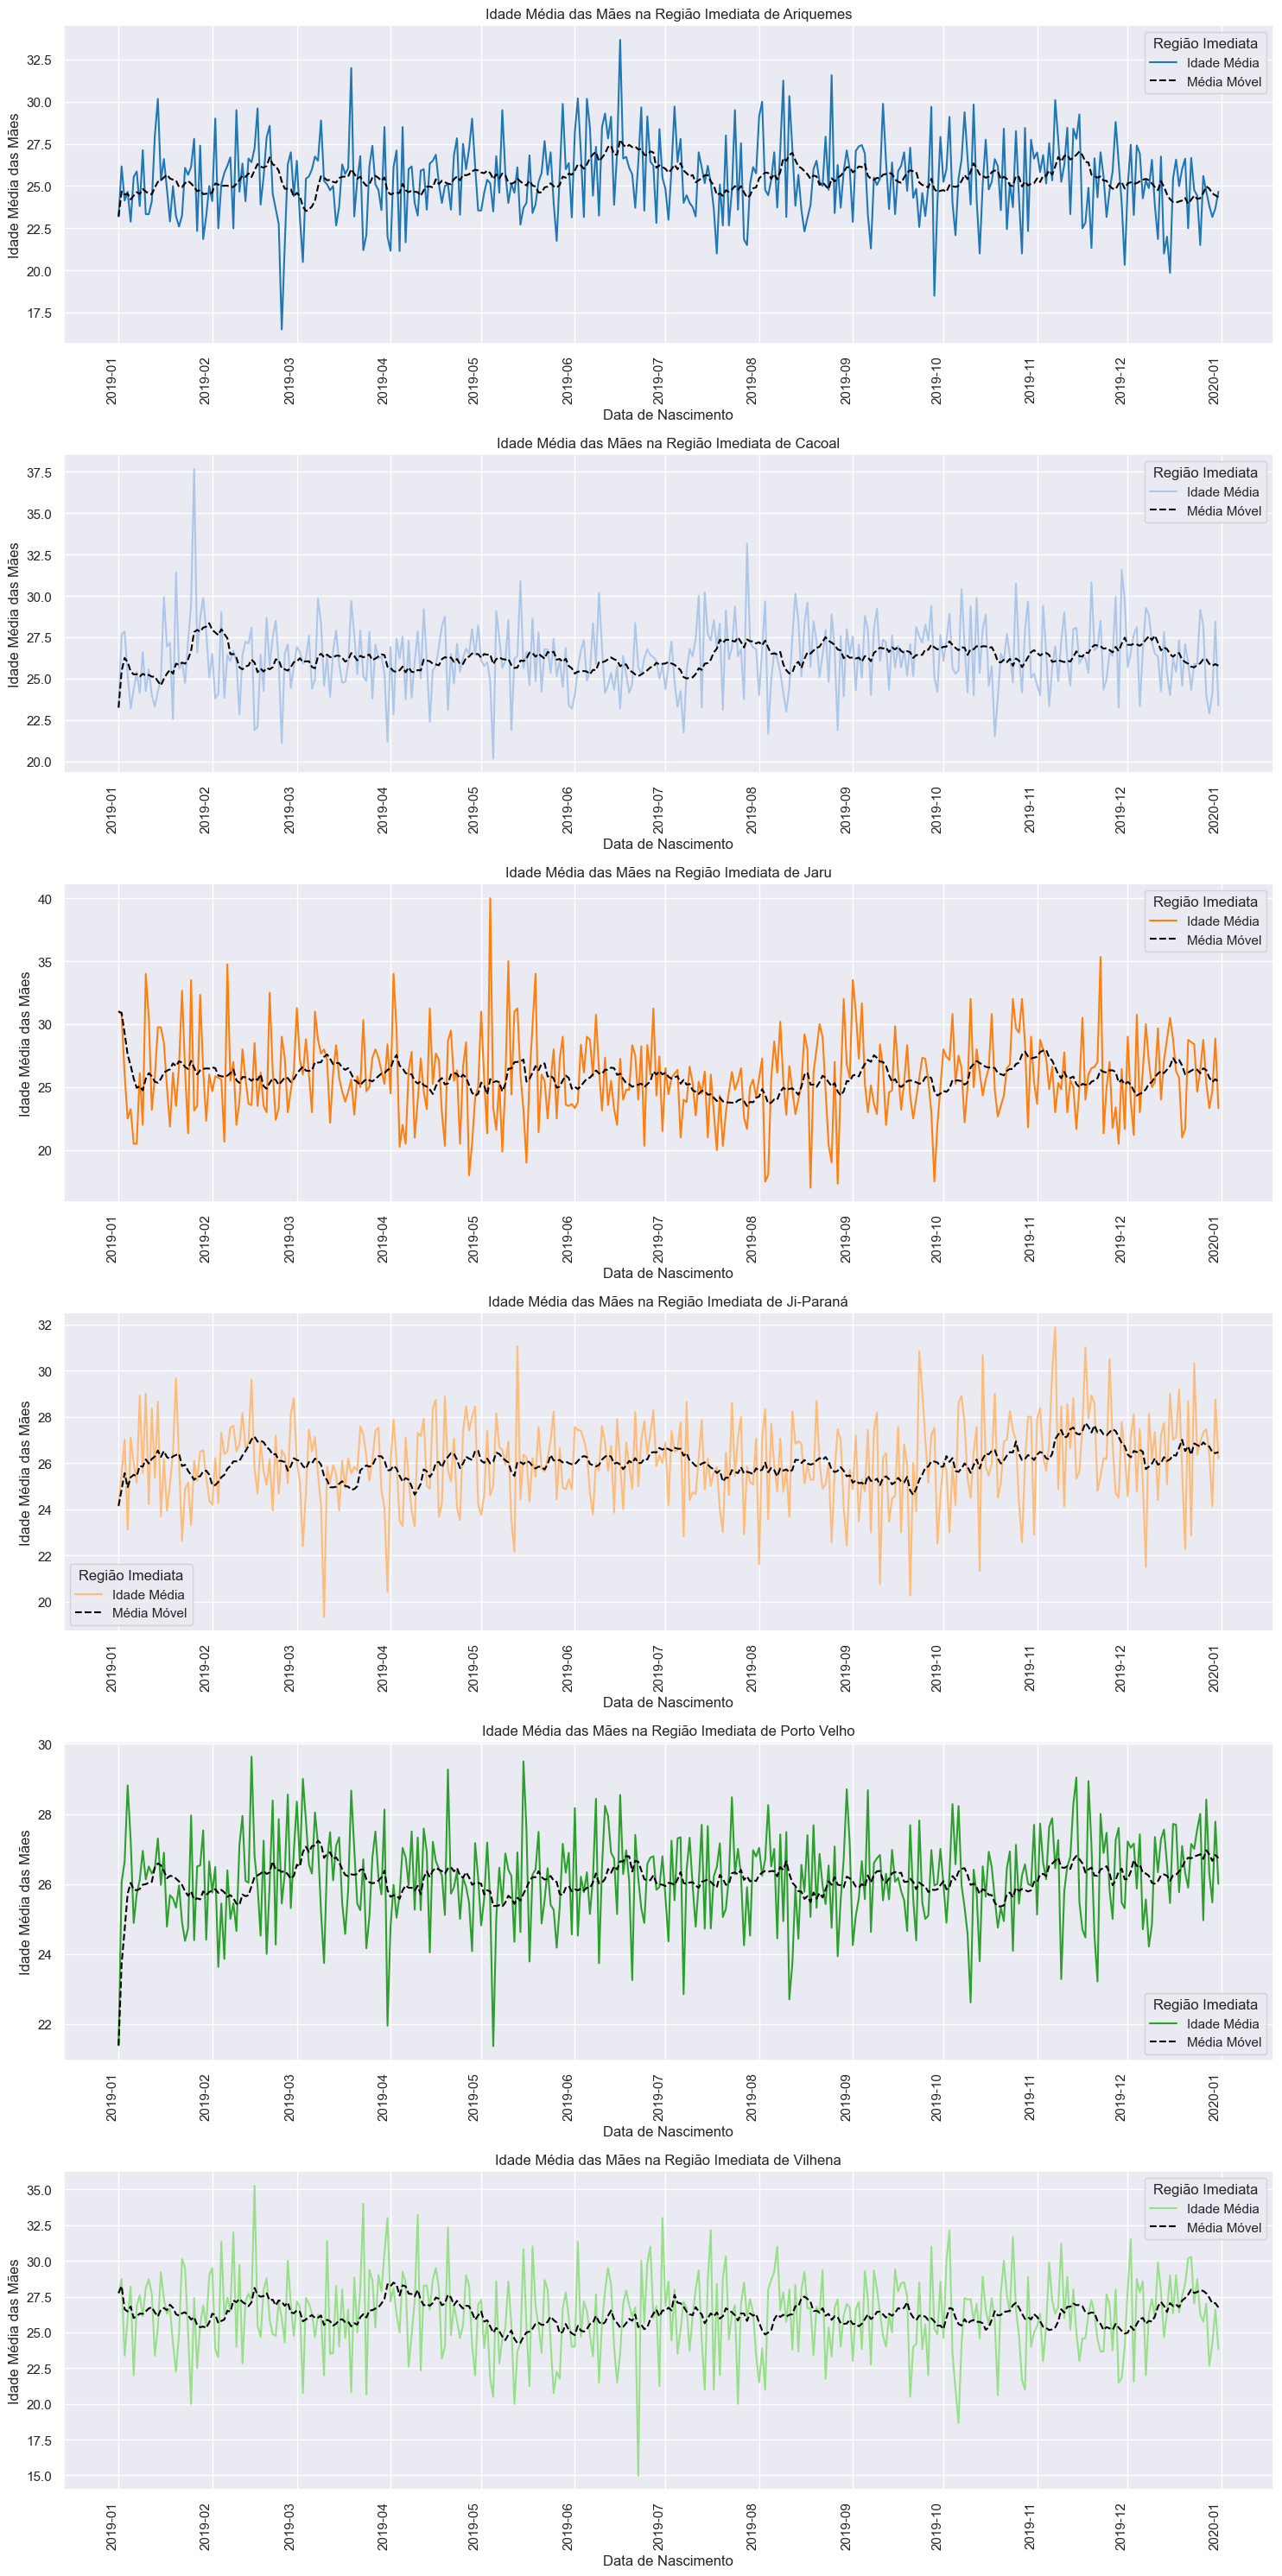

In [32]:
# obter as regiões únicas e determinar o número de subplots necessários
regioes = task5_grouped['regiao'].unique()
num_regioes = len(regioes)

# criar a figura e os eixos
fig, axes = plt.subplots(nrows=num_regioes, ncols=1, figsize=[15, 5 * num_regioes])

# adicionar uma linha e um gráfico para cada região
for i, regiao in enumerate(regioes):
    subset = task5_grouped[task5_grouped['regiao'] == regiao]
    
    # plotar os dados originais
    axes[i].plot(subset['DTNASC'], subset['IDADEMAE'], label='Idade Média', color=plt.cm.tab20(i % num_regioes))

    # calcular a média móvel (suavização)
    subset = subset.sort_values(by='DTNASC')
    rolling_mean = subset['IDADEMAE'].rolling(window=12, min_periods=1).mean()
    
    # plotar a linha suavizada
    axes[i].plot(subset['DTNASC'], rolling_mean, label='Média Móvel', color='black', linestyle='--')

    # configurar o título e rótulos dos eixos
    axes[i].set_title(f'Idade Média das Mães na Região Imediata de {regiao}')
    axes[i].set_xlabel('Data de Nascimento')
    axes[i].set_ylabel('Idade Média das Mães')
    axes[i].legend(title='Região Imediata')

    # configurar o formato de data para o eixo x
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())  # ajusta o intervalo de tempo conforme necessário
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(axes[i].get_xticklabels(), rotation=90, ha='right')

# ajustar o layout
plt.tight_layout()

# mostrar o gráfico
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [33]:
idh = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão d'Oeste": "IDH-M médio",
    "Santa Luzia d'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari": "IDH-M médio",
    "São Felipe d'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada d'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia d'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta d'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho d'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

In [34]:
apgar =  {0: 'Asfixia Grave',
          1: 'Asfixia Grave',
          2: 'Asfixia Grave',
          3: 'Asfixia Grave',
          4: 'Asfixia Moderada',
          5: 'Asfixia Moderada',
          6: 'Asfixia Moderada',
          7: 'Boa Vitalidade',
          8: 'Boa Vitalidade',
          9: 'Boa Vitalidade',
          10: 'Boa Vitalidade'
}

In [35]:
# visualizando o range de dados da variável APGAR5
sinasc_raw.APGAR5.unique()

array([10.,  9.,  7.,  0.,  8.,  4.,  3.,  6.,  5., nan,  2.,  1.])

In [36]:
# separando o as variáveis do dataframe
task6 = sinasc_raw[['munResNome', 'APGAR5', 'ESCMAE']].copy()
task6

,munResNome,APGAR5,ESCMAE
0,Alta Floresta D'Oeste,10.0,8 a 11 anos
1,Alta Floresta D'Oeste,9.0,8 a 11 anos
2,Alta Floresta D'Oeste,10.0,8 a 11 anos
3,Alto Alegre dos Parecis,10.0,12 anos ou mais
4,Alta Floresta D'Oeste,10.0,8 a 11 anos
...,...,...,...
27023,Vilhena,9.0,12 anos ou mais
27024,Chupinguaia,9.0,8 a 11 anos
27025,Vilhena,10.0,8 a 11 anos
27026,Vilhena,9.0,8 a 11 anos


In [37]:
# criando uma nova coluna 'Regiao' baseada no dicionário 'imediatas'
task6.loc[:, 'idh'] = task6['munResNome'].map(idh)
task6.loc[:, 'apgar'] = task6['APGAR5'].map(apgar)
print(f'variável: {task6.apgar.value_counts()}\n\nvariável:{task6.idh.value_counts()}')

variável: apgar
Boa Vitalidade      26704
Asfixia Moderada      147
Asfixia Grave          74
Name: count, dtype: int64

variável:idh
IDH-M alto     16855
IDH-M médio     6910
IDH-M baixo     1326
Name: count, dtype: int64


In [38]:
# agrupar por data de nascimento e região imediata e calcular a idade média das mães
task6_grouped = task6.groupby(['idh', 'APGAR5'])
task6_grouped.head()

,munResNome,APGAR5,ESCMAE,idh,apgar
3,Alto Alegre dos Parecis,10.0,12 anos ou mais,IDH-M baixo,Boa Vitalidade
6,Novo Horizonte do Oeste,10.0,8 a 11 anos,IDH-M médio,Boa Vitalidade
21,Rolim de Moura,10.0,12 anos ou mais,IDH-M alto,Boa Vitalidade
23,Alto Alegre dos Parecis,10.0,8 a 11 anos,IDH-M baixo,Boa Vitalidade
24,Alto Alegre dos Parecis,10.0,8 a 11 anos,IDH-M baixo,Boa Vitalidade
...,...,...,...,...,...
21293,Vale do Anari,5.0,NaN,IDH-M baixo,Asfixia Moderada
25995,Cerejeiras,0.0,8 a 11 anos,IDH-M médio,Asfixia Grave
26243,Buritis,3.0,8 a 11 anos,IDH-M médio,Asfixia Grave
26620,Seringueiras,6.0,12 anos ou mais,IDH-M baixo,Asfixia Moderada


In [43]:
# agrupar os dados
task6_grouped = task6.groupby(['idh', 'munResNome']).agg({'APGAR5': ['mean', 'median']}).reset_index()
task6_grouped

idh                 munResNome    APGAR5       
                                                mean median
0    IDH-M alto                  Ariquemes  9.192597    9.0
1    IDH-M alto                     Cacoal  9.185725    9.0
2    IDH-M alto                  Ji-Paraná  9.114626    9.0
3    IDH-M alto              Pimenta Bueno  9.055195    9.0
4    IDH-M alto                Porto Velho  9.212284    9.0
5    IDH-M alto             Rolim de Moura  9.097192    9.0
6    IDH-M alto                    Vilhena  9.089015    9.0
7   IDH-M baixo    Alto Alegre dos Parecis  9.123377    9.0
8   IDH-M baixo     Campo Novo de Rondônia  9.493976   10.0
9   IDH-M baixo  Governador Jorge Teixeira  9.089286    9.0
10  IDH-M baixo                Nova Mamoré  9.368910    9.0
11  IDH-M baixo                 Nova União  9.153846    9.0
12  IDH-M baixo               Seringueiras  9.404762   10.0
13  IDH-M baixo                  Theobroma  9.061856    9.0
14  IDH-M baixo              Vale do Anari  8.946237    9.0
15  IDH-M médio               Alto Paraíso  9.296460    9.0
16  IDH-M médio                    Buritis  9.714777   10.0
17  IDH-M médio                     Cabixi  9.125000    9.0
18  IDH-M médio                Cacaulândia  9.120000    9.0
19  IDH-M médio         Candeias do Jamari  9.265060    9.0
20  IDH-M médio               Castanheiras  9.031250    9.0
21  IDH-M médio                 Cerejeiras  9.178723    9.0
22  IDH-M médio                Chupinguaia  9.056250    9.0
23  IDH-M médio          Colorado do Oeste  9.042056    9.0
24  IDH-M médio                 Corumbiara  9.228346    9.0
25  IDH-M médio              Costa Marques  9.008621    9.0
26  IDH-M médio                    Cujubim  9.156098    9.0
27  IDH-M médio              Guajará-Mirim  9.279009    9.0
28  IDH-M médio            Itapuã do Oeste  9.259259    9.0
29  IDH-M médio                       Jaru  9.062429    9.0
30  IDH-M médio         Ministro Andreazza  9.166667    9.0
31  IDH-M médio           Mirante da Serra  9.304878    9.0
32  IDH-M médio                Monte Negro  9.326633    9.0
33  IDH-M médio    Novo Horizonte do Oeste  9.142857    9.0
34  IDH-M médio        Ouro Preto do Oeste  9.259141    9.0
35  IDH-M médio                    Parecis  9.068182    9.0
36  IDH-M médio       Pimenteiras do Oeste  9.125000    9.0
37  IDH-M médio          Presidente Médici  9.019802    9.0
38  IDH-M médio      Primavera de Rondônia  8.953488    9.0
39  IDH-M médio                 Rio Crespo  9.220000    9.0
40  IDH-M médio   São Francisco do Guaporé  9.003311    9.0
41  IDH-M médio      São Miguel do Guaporé  9.371105   10.0
42  IDH-M médio              Teixeirópolis  9.031250    9.0
43  IDH-M médio                      Urupá  9.331325    9.0
44  IDH-M médio            Vale do Paraíso  9.271605    9.0

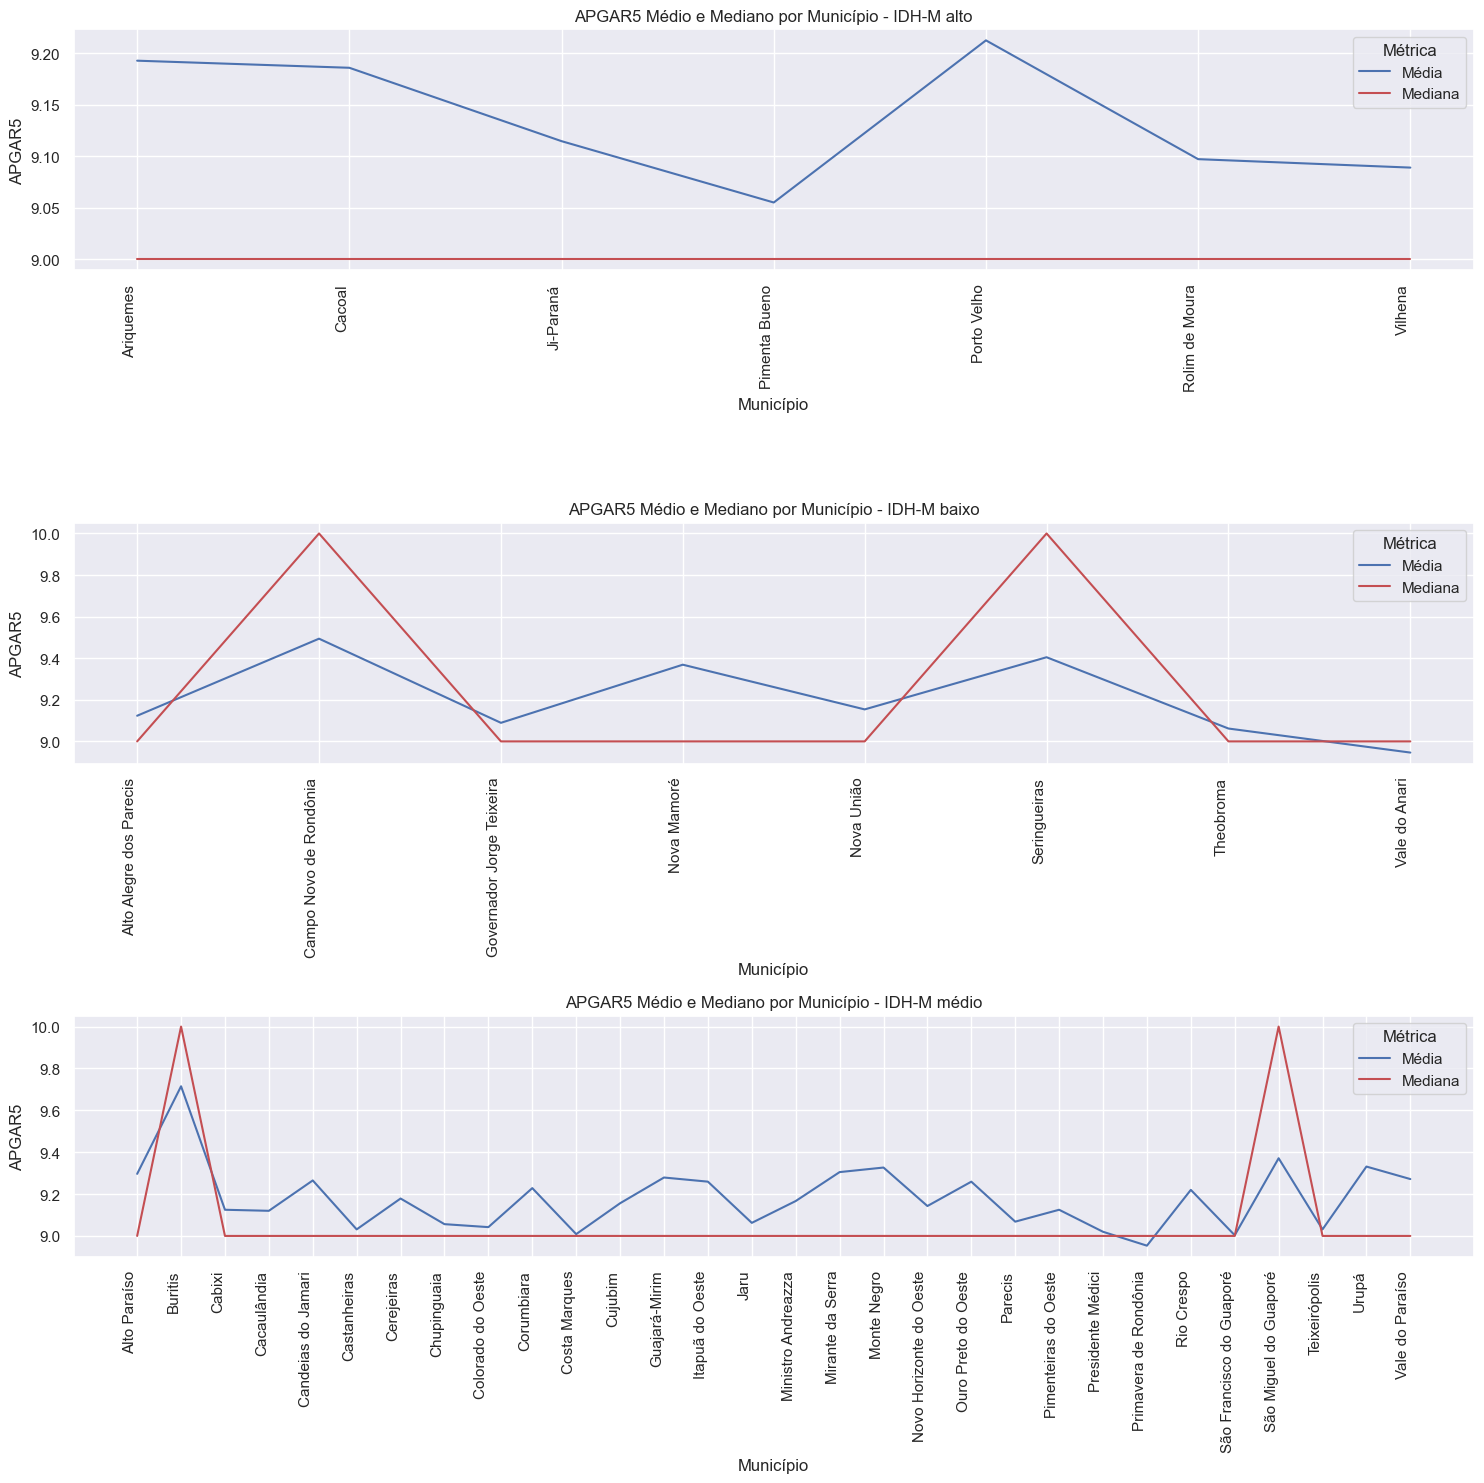

In [44]:
# obter os valores únicos de IDH-M e determinar o número de subplots necessários
idhv = task6_grouped['idh'].unique()
num_regioes_idh = len(idhv)

# criar a figura e os eixos
fig, axes = plt.subplots(nrows=num_regioes_idh, ncols=1, figsize=[15, 5 * num_regioes_idh])

# adicionar uma linha e um gráfico para cada nível de IDH
for i, idh in enumerate(idhv):
    subset = task6_grouped[task6_grouped['idh'] == idh]
    
    # plotar a média de APGAR5 para cada município
    axes[i].plot(subset['munResNome'], subset[('APGAR5', 'mean')], label='Média', color='b')
    axes[i].plot(subset['munResNome'], subset[('APGAR5', 'median')], label='Mediana', color='r')
    
    axes[i].set_title(f'APGAR5 Médio e Mediano por Município - {idh}')
    axes[i].set_xlabel('Município')
    axes[i].set_ylabel('APGAR5')
    axes[i].legend(title='Métrica')
    
    # configurar a rotação dos rótulos no eixo X para uma melhor visualização
    plt.setp(axes[i].get_xticklabels(), rotation=90, ha='right')

# ajustar o layout
plt.tight_layout()

# mostrar o gráfico
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [45]:
desenvolvimento_municipios = {
    'Espigão d\'Oeste': 'Desenvolvimento regular',
    'Seringueiras': 'Desenvolvimento regular',
    'Alvorada d\'Oeste': 'Desenvolvimento regular',
    'Itapuã do Oeste': 'Desenvolvimento regular',
    'Cabixi': 'Desenvolvimento regular',
    'Novo Horizonte do Oeste': 'Desenvolvimento regular',
    'Nova Brasilândia d\'Oeste': 'Desenvolvimento regular',
    'Vale do Paraíso': 'Desenvolvimento regular',
    'Corumbiara': 'Desenvolvimento regular',
    'Alto Paraíso': 'Desenvolvimento regular',
    'Cacaulândia': 'Desenvolvimento regular',
    'Vale do Anari': 'Desenvolvimento regular',
    'Ministro Andreazza': 'Desenvolvimento regular',
    'Costa Marques': 'Desenvolvimento regular',
    'Nova União': 'Desenvolvimento regular',
    'Guajará-Mirim': 'Desenvolvimento regular',
    'Mirante da Serra': 'Desenvolvimento regular',
    'Parecis': 'Desenvolvimento regular',
    'Castanheiras': 'Desenvolvimento regular',
    'Theobroma': 'Desenvolvimento regular',
    'Machadinho d\'Oeste': 'Desenvolvimento regular',
    'Campo Novo de Rondônia': 'Desenvolvimento regular',
    'Nova Mamoré': 'Desenvolvimento regular',
    'Cujubim': 'Desenvolvimento regular',
    'Alto Alegre dos Parecis': 'Desenvolvimento regular',
    'Governador Jorge Teixeira': 'Desenvolvimento regular',
    'Ariquemes': 'Desenvolvimento moderado',
    'Vilhena': 'Desenvolvimento moderado',
    'Pimenta Bueno': 'Desenvolvimento moderado',
    'Porto Velho': 'Desenvolvimento moderado',
    'Ji-Paraná': 'Desenvolvimento moderado',
    'Cacoal': 'Desenvolvimento moderado',
    'Santa Luzia d\'Oeste': 'Desenvolvimento moderado',
    'Rolim de Moura': 'Desenvolvimento moderado',
    'Chupinguaia': 'Desenvolvimento moderado',
    'São Miguel do Guaporé': 'Desenvolvimento moderado',
    'Pimenteiras do Oeste': 'Desenvolvimento moderado',
    'Teixeirópolis': 'Desenvolvimento moderado',
    'Colorado do Oeste': 'Desenvolvimento moderado',
    'Jaru': 'Desenvolvimento moderado',
    'Rio Crespo': 'Desenvolvimento moderado',
    'Primavera de Rondônia': 'Desenvolvimento moderado',
    'Alta Floresta d\'Oeste': 'Desenvolvimento moderado',
    'Ouro Preto do Oeste': 'Desenvolvimento moderado',
    'São Francisco do Guaporé': 'Desenvolvimento moderado',
    'Candeias do Jamari': 'Desenvolvimento moderado',
    'Buritis': 'Desenvolvimento moderado',
    'São Felipe d\'Oeste': 'Desenvolvimento moderado',
    'Presidente Médici': 'Desenvolvimento moderado',
    'Cerejeiras': 'Desenvolvimento moderado',
    'Monte Negro': 'Desenvolvimento moderado',
    'Urupá': 'Desenvolvimento moderado'
}


In [52]:
# separando o as variáveis do dataframe
task7 = sinasc_raw[['munResNome', 'PESO', 'QTDGESTANT', 'CONSPRENAT']].copy()
task7

,munResNome,PESO,QTDGESTANT,CONSPRENAT
0,Alta Floresta D'Oeste,3685,0.0,8.0
1,Alta Floresta D'Oeste,3055,1.0,10.0
2,Alta Floresta D'Oeste,3460,2.0,8.0
3,Alto Alegre dos Parecis,2982,0.0,6.0
4,Alta Floresta D'Oeste,3310,1.0,8.0
...,...,...,...,...
27023,Vilhena,2110,1.0,7.0
27024,Chupinguaia,3310,0.0,12.0
27025,Vilhena,3065,1.0,8.0
27026,Vilhena,2352,1.0,10.0


In [53]:
# criando uma nova coluna 'Regiao' baseada no dicionário 'imediatas'
task7.loc[:, 'ifd'] = task6['munResNome'].map(desenvolvimento_municipios)
print(f'variável: {task7.ifd.value_counts()}\n\nvariável:{task7.QTDGESTANT.value_counts()}\n\nvariável:{task7.CONSPRENAT.value_counts()}')

variável: ifd
Desenvolvimento moderado    21426
Desenvolvimento regular      3665
Name: count, dtype: int64

variável:QTDGESTANT
0.0     8610
1.0     8446
2.0     4961
3.0     2177
4.0      887
5.0      359
6.0      186
7.0      101
8.0       41
9.0       25
10.0      12
12.0       3
14.0       3
11.0       2
15.0       1
13.0       1
52.0       1
Name: count, dtype: int64

variável:CONSPRENAT
8.0     4166
9.0     3557
7.0     3516
10.0    3115
6.0     2812
5.0     1853
11.0    1633
4.0     1317
12.0    1027
3.0      747
13.0     608
14.0     548
2.0      450
1.0      181
15.0     141
16.0     108
0.0       70
99.0      51
17.0      48
18.0      45
20.0      21
19.0      20
39.0      16
40.0      16
38.0      12
37.0       7
41.0       5
21.0       2
23.0       2
35.0       1
36.0       1
22.0       1
61.0       1
Name: count, dtype: int64


In [78]:
# agrupar os dados
task7_grouped = task7.groupby(['ifd', 'munResNome']).agg({'PESO': ['mean', 'median'],'QTDGESTANT': ['mean', 'median'], 'CONSPRENAT': ['mean', 'median']}).reset_index()
task7_grouped

ifd                 munResNome         PESO          \
                                                                mean  median   
0   Desenvolvimento moderado                  Ariquemes  3251.362637  3275.0   
1   Desenvolvimento moderado                    Buritis  3229.876501  3240.0   
2   Desenvolvimento moderado                     Cacoal  3249.720524  3257.5   
3   Desenvolvimento moderado         Candeias do Jamari  3296.305638  3325.0   
4   Desenvolvimento moderado                 Cerejeiras  3168.367089  3260.0   
5   Desenvolvimento moderado                Chupinguaia  3317.419753  3347.5   
6   Desenvolvimento moderado          Colorado do Oeste  3231.897196  3307.5   
7   Desenvolvimento moderado                       Jaru  3277.671964  3260.0   
8   Desenvolvimento moderado                  Ji-Paraná  3253.078368  3270.0   
9   Desenvolvimento moderado                Monte Negro  3217.060302  3250.0   
10  Desenvolvimento moderado        Ouro Preto do Oeste  3226.835182  3245.0   
11  Desenvolvimento moderado              Pimenta Bueno  3305.430195  3320.0   
12  Desenvolvimento moderado       Pimenteiras do Oeste  3340.350000  3368.0   
13  Desenvolvimento moderado                Porto Velho  3242.820078  3280.0   
14  Desenvolvimento moderado          Presidente Médici  3173.065789  3221.0   
15  Desenvolvimento moderado      Primavera de Rondônia  3185.581395  3290.0   
16  Desenvolvimento moderado                 Rio Crespo  3202.760000  3315.0   
17  Desenvolvimento moderado             Rolim de Moura  3223.445523  3260.0   
18  Desenvolvimento moderado   São Francisco do Guaporé  3295.564356  3340.0   
19  Desenvolvimento moderado      São Miguel do Guaporé  3177.988669  3230.0   
20  Desenvolvimento moderado              Teixeirópolis  3185.250000  3182.5   
21  Desenvolvimento moderado                      Urupá  3190.941176  3230.0   
22  Desenvolvimento moderado                    Vilhena  3230.250314  3272.0   
23   Desenvolvimento regular    Alto Alegre dos Parecis  3261.383117  3262.5   
24   Desenvolvimento regular               Alto Paraíso  3217.969027  3255.0   
25   Desenvolvimento regular                     Cabixi  3336.100000  3355.0   
26   Desenvolvimento regular                Cacaulândia  3232.360000  3260.0   
27   Desenvolvimento regular     Campo Novo de Rondônia  3227.969880  3277.5   
28   Desenvolvimento regular               Castanheiras  3206.312500  3175.0   
29   Desenvolvimento regular                 Corumbiara  3294.685039  3280.0   
30   Desenvolvimento regular              Costa Marques  3249.721030  3270.0   
31   Desenvolvimento regular                    Cujubim  3292.243902  3300.0   
32   Desenvolvimento regular  Governador Jorge Teixeira  3238.991071  3217.5   
33   Desenvolvimento regular              Guajará-Mirim  3293.094750  3320.0   
34   Desenvolvimento regular            Itapuã do Oeste  3308.834862  3295.0   
35   Desenvolvimento regular         Ministro Andreazza  3135.595238  3162.5   
36   Desenvolvimento regular           Mirante da Serra  3147.585366  3185.0   
37   Desenvolvimento regular                Nova Mamoré  3248.851852  3280.0   
38   Desenvolvimento regular                 Nova União  3193.221154  3170.0   
39   Desenvolvimento regular    Novo Horizonte do Oeste  3244.744898  3270.0   
40   Desenvolvimento regular                    Parecis  3096.363636  3110.0   
41   Desenvolvimento regular               Seringueiras  3289.142857  3337.5   
42   Desenvolvimento regular                  Theobroma  3227.865979  3230.0   
43   Desenvolvimento regular              Vale do Anari  3223.806452  3230.0   
44   Desenvolvimento regular            Vale do Paraíso  3353.925926  3310.0   

   QTDGESTANT        CONSPRENAT         
         mean median       mean median  
0    1.147076    1.0   8.747368    8.0  
1    1.226168    1.0   8.438687    8.0  
2    1.125000    1.0   8.729532    8.0  
3    1.701639    1.0   7.955272    8.0  
4    1.257511    1

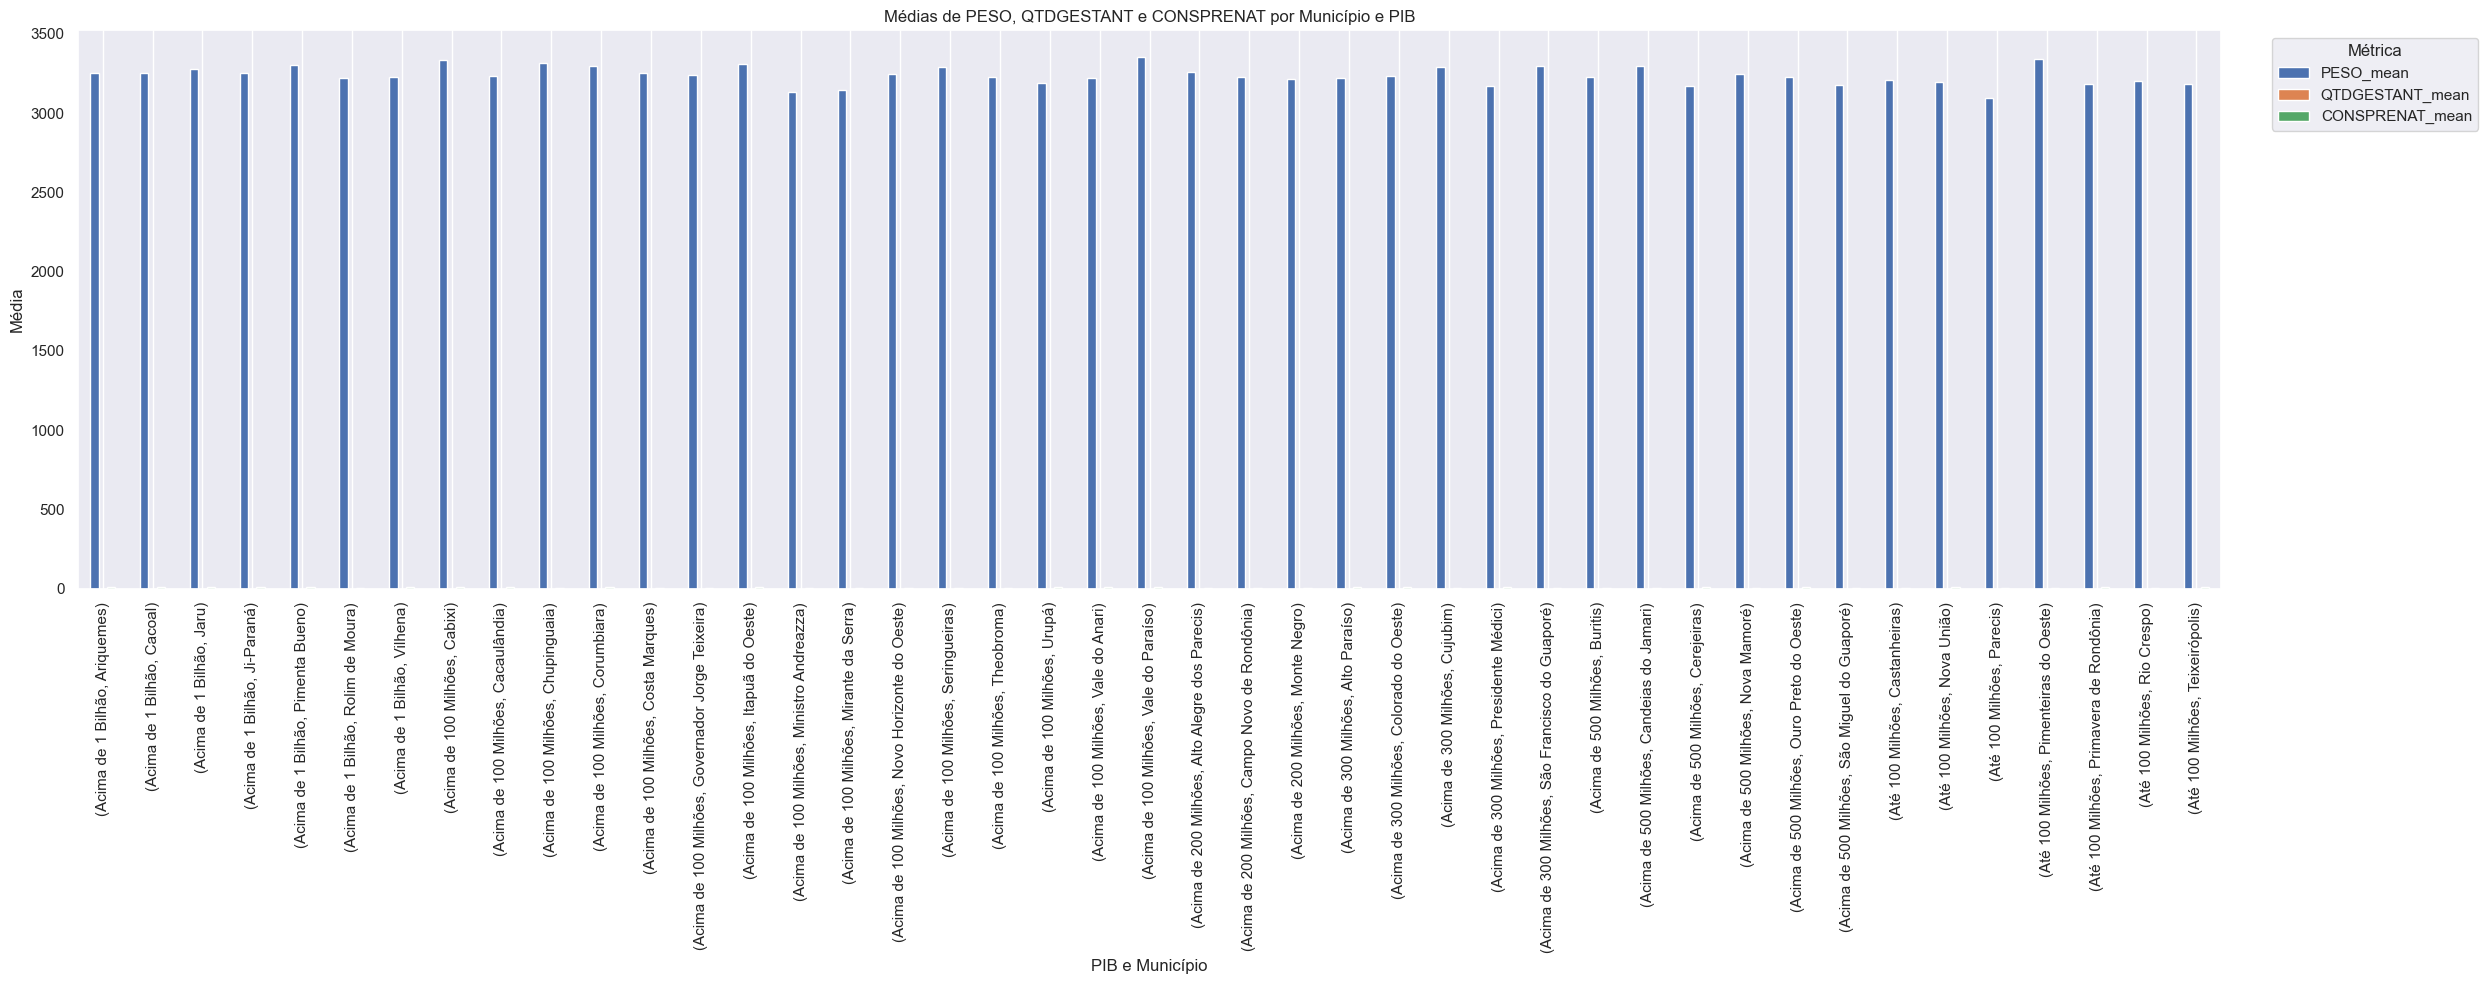

In [79]:
# Obter os valores únicos de IFD e determinar o número de subplots necessários
ifd_unique = task7_grouped['ifd'].unique()
num_regioes_ifd = len(ifd_unique)

# Criar a figura e os eixos
fig, axes = plt.subplots(nrows=num_regioes_ifd, ncols=1, figsize=[15, 5 * num_regioes_ifd])

# Adicionar uma linha e um gráfico para cada nível de IFD
for i, ifd in enumerate(ifd_unique):
    subset = task7_grouped[task7_grouped['ifd'] == ifd]
    
    # Calcular a média móvel de 3 períodos para PESO
    subset['PESO_moving_avg'] = subset[('PESO', 'mean')].rolling(window=3).mean()
    
    # Plotar a média e mediana de PESO para cada município
    axes[i].plot(subset['munResNome'], subset[('PESO', 'mean')], label='Média PESO', color='b')
#     axes[i].plot(subset['munResNome'], subset[('PESO', 'median')], label='Mediana PESO', color='r', linestyle='--')
    
    # Plotar a média móvel de PESO
    axes[i].plot(subset['munResNome'], subset['PESO_moving_avg'], label='Média Móvel PESO', color='g', linestyle='--')
    
    axes[i].set_title(f'Média Móvel de PESO por Município - IFD: {ifd}')
    axes[i].set_xlabel('Município')
    axes[i].set_ylabel('Valores de PESO')
    axes[i].legend(title='Métrica')
    
    # Configurar a rotação dos rótulos no eixo X para uma melhor visualização
    plt.setp(axes[i].get_xticklabels(), rotation=90, ha='right')

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [65]:
pib = {
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Aumento": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão"
}


In [73]:
# agrupar os dados
task8 = sinasc_raw[['PESO', 'munResNome', 'QTDGESTANT', 'CONSPRENAT']]
task8.head(n=2)

,PESO,munResNome,QTDGESTANT,CONSPRENAT
0,3685,Alta Floresta D'Oeste,0.0,8.0
1,3055,Alta Floresta D'Oeste,1.0,10.0


In [75]:
# criando uma nova coluna 'Regiao' baseada no dicionário 'imediatas'
task8.loc[:, 'pib'] = task8['munResNome'].map(pib)
print(f'variável: {task8.pib.value_counts()}\n\nvariável:{task8.QTDGESTANT.value_counts()}\n\nvariável:{task8.CONSPRENAT.value_counts()}')

variável: pib
Acima de 1 Bilhão       9299
Acima de 500 Milhões    2573
Acima de 100 Milhões    1853
Acima de 300 Milhões    1252
Acima de 200 Milhões     519
Até 100 Milhões          377
Name: count, dtype: int64

variável:QTDGESTANT
0.0     8610
1.0     8446
2.0     4961
3.0     2177
4.0      887
5.0      359
6.0      186
7.0      101
8.0       41
9.0       25
10.0      12
12.0       3
14.0       3
11.0       2
15.0       1
13.0       1
52.0       1
Name: count, dtype: int64

variável:CONSPRENAT
8.0     4166
9.0     3557
7.0     3516
10.0    3115
6.0     2812
5.0     1853
11.0    1633
4.0     1317
12.0    1027
3.0      747
13.0     608
14.0     548
2.0      450
1.0      181
15.0     141
16.0     108
0.0       70
99.0      51
17.0      48
18.0      45
20.0      21
19.0      20
39.0      16
40.0      16
38.0      12
37.0       7
41.0       5
21.0       2
23.0       2
35.0       1
36.0       1
22.0       1
61.0       1
Name: count, dtype: int64


In [87]:
# escrevendo a soma, média, mínima, máxima, mediana, desvio padrão e variância
agg3 = task8.groupby(['pib'], observed=True)
estatisticas3 = agg3.agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
estatisticas3

PESO                                              \
                           sum         mean  min   max  median         std   
pib                                                                          
Acima de 1 Bilhão     30232945  3251.203893  292  5720  3274.0  522.670280   
Acima de 100 Milhões   6022977  3250.392337  425  4810  3265.0  525.017425   
Acima de 200 Milhões   1678291  3233.701349  930  4680  3260.0  505.558304   
Acima de 300 Milhões   4056965  3240.387380  258  4888  3290.0  522.024944   
Acima de 500 Milhões   8306243  3228.232802  285  5135  3255.0  533.026221   
Até 100 Milhões        1205525  3197.679045  320  4505  3210.0  542.968491   

                                     
                                var  
pib                                  
Acima de 1 Bilhão     273184.221491  
Acima de 100 Milhões  275643.296853  
Acima de 200 Milhões  255589.198280  
Acima de 300 Milhões  272510.042463  
Acima de 500 Milhões  284116.952392  
Até 100 Milhões       294814.782352

In [81]:
task8_grouped = task8.groupby(['pib', 'munResNome']).agg({'PESO': ['mean', 'median'],'QTDGESTANT': ['mean', 'median'], 'CONSPRENAT': ['mean', 'median']}).reset_index()
task8_grouped

pib                 munResNome         PESO          \
                                                            mean  median   
0      Acima de 1 Bilhão                  Ariquemes  3251.362637  3275.0   
1      Acima de 1 Bilhão                     Cacoal  3249.720524  3257.5   
2      Acima de 1 Bilhão                       Jaru  3277.671964  3260.0   
3      Acima de 1 Bilhão                  Ji-Paraná  3253.078368  3270.0   
4      Acima de 1 Bilhão              Pimenta Bueno  3305.430195  3320.0   
5      Acima de 1 Bilhão             Rolim de Moura  3223.445523  3260.0   
6      Acima de 1 Bilhão                    Vilhena  3230.250314  3272.0   
7   Acima de 100 Milhões                     Cabixi  3336.100000  3355.0   
8   Acima de 100 Milhões                Cacaulândia  3232.360000  3260.0   
9   Acima de 100 Milhões                Chupinguaia  3317.419753  3347.5   
10  Acima de 100 Milhões                 Corumbiara  3294.685039  3280.0   
11  Acima de 100 Milhões              Costa Marques  3249.721030  3270.0   
12  Acima de 100 Milhões  Governador Jorge Teixeira  3238.991071  3217.5   
13  Acima de 100 Milhões            Itapuã do Oeste  3308.834862  3295.0   
14  Acima de 100 Milhões         Ministro Andreazza  3135.595238  3162.5   
15  Acima de 100 Milhões           Mirante da Serra  3147.585366  3185.0   
16  Acima de 100 Milhões    Novo Horizonte do Oeste  3244.744898  3270.0   
17  Acima de 100 Milhões               Seringueiras  3289.142857  3337.5   
18  Acima de 100 Milhões                  Theobroma  3227.865979  3230.0   
19  Acima de 100 Milhões                      Urupá  3190.941176  3230.0   
20  Acima de 100 Milhões              Vale do Anari  3223.806452  3230.0   
21  Acima de 100 Milhões            Vale do Paraíso  3353.925926  3310.0   
22  Acima de 200 Milhões    Alto Alegre dos Parecis  3261.383117  3262.5   
23  Acima de 200 Milhões     Campo Novo de Rondônia  3227.969880  3277.5   
24  Acima de 200 Milhões                Monte Negro  3217.060302  3250.0   
25  Acima de 300 Milhões               Alto Paraíso  3217.969027  3255.0   
26  Acima de 300 Milhões          Colorado do Oeste  3231.897196  3307.5   
27  Acima de 300 Milhões                    Cujubim  3292.243902  3300.0   
28  Acima de 300 Milhões          Presidente Médici  3173.065789  3221.0   
29  Acima de 300 Milhões   São Francisco do Guaporé  3295.564356  3340.0   
30  Acima de 500 Milhões                    Buritis  3229.876501  3240.0   
31  Acima de 500 Milhões         Candeias do Jamari  3296.305638  3325.0   
32  Acima de 500 Milhões                 Cerejeiras  3168.367089  3260.0   
33  Acima de 500 Milhões                Nova Mamoré  3248.851852  3280.0   
34  Acima de 500 Milhões        Ouro Preto do Oeste  3226.835182  3245.0   
35  Acima de 500 Milhões      São Miguel do Guaporé  3177.988669  3230.0   
36       Até 100 Milhões               Castanheiras  3206.312500  3175.0   
37       Até 100 Milhões                 Nova União  3193.221154  3170.0   
38       Até 100 Milhões                    Parecis  3096.363636  3110.0   
39       Até 100 Milhões       Pimenteiras do Oeste  3340.350000  3368.0   
40       Até 100 Milhões      Primavera de Rondônia  3185.581395  3290.0   
41       Até 100 Milhões                 Rio Crespo  3202.760000  3315.0   
42       Até 100 Milhões              Teixeirópolis  3185.250000  3182.5   

   QTDGESTANT        CONSPRENAT         
         mean median       mean median  
0    1.147076    1.0   8.747368    8.0  
1    1.125000    1.0   8.729532    8.0  
2    1.093714    1.0   9.247991    9.0  
3    1.141740    1.0   9.094507    9.0  
4    1.057096    1.0   8.707317    9.0  
5    1.108578    1.0   8.155286    8.0  
6    1.143849    1.0   9.682711    9.0  
7    1.025000    1.0  10.212500   10.0  
8    1.069444    1.0   9.492958    8.0  
9    1.187097    1.0   7.666667    7.5  
10   1.039683    1.0   8.865079    9.0  
11   1.526087    1.0   8.432900    8.0  
12   0.936364    1.0   8.5

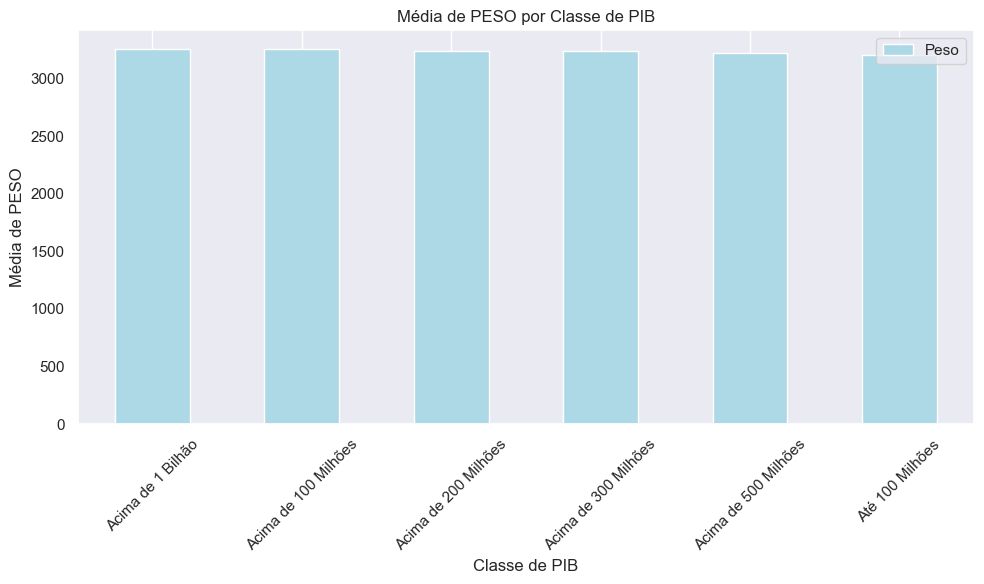

In [85]:
task8_grouped_reset = task8_grouped.reset_index()
pib_weight_avg = task8_grouped_reset.groupby('pib')['PESO_mean'].mean()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=[10, 6])
pib_weight_avg.plot(kind='bar', ax=ax, color='lightblue')

# Adicionar título e rótulos
plt.title('Média de PESO por Classe de PIB')
plt.xlabel('Classe de PIB')
plt.ylabel('Média de PESO')

# Ajustar a legenda
ax.legend(['Peso'], loc='upper right')

# Rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=45)

plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para que tudo se ajuste bem
plt.show()